In [1]:
import os
import pandas as pd

#CONTAINER_ID = 'b6b4b6b4b6b4'
STIMULUS = 'natural_scenes'
RES = 'default'
containers_to_remove = []#['718', '855']
input_dir = 'gnorm_neg'

"""
# get all metrics csv with stimulus
all_metrics = [f for f in os.listdir(input_dir) if f.startswith('metrics') and STIMULUS in f]
if RES != 'default':
    all_metrics = [f for f in all_metrics if 'res' in f]
if RES == 'default' and STIMULUS == 'drifting_gratings':
    all_metrics = [f for f in all_metrics if 'res' not in f]
#remove containers
for container in containers_to_remove:
    all_metrics = [f for f in all_metrics if container not in f]
print(len(all_metrics))
"""

"\n# get all metrics csv with stimulus\nall_metrics = [f for f in os.listdir(input_dir) if f.startswith('metrics') and STIMULUS in f]\nif RES != 'default':\n    all_metrics = [f for f in all_metrics if 'res' in f]\nif RES == 'default' and STIMULUS == 'drifting_gratings':\n    all_metrics = [f for f in all_metrics if 'res' not in f]\n#remove containers\nfor container in containers_to_remove:\n    all_metrics = [f for f in all_metrics if container not in f]\nprint(len(all_metrics))\n"

In [2]:
import os

final_res = []
input_dirs = [
    'neuroformer_pos', 
    'neuroformer_neg',
    ]#, 'gnorm_smoothed', 'gnorm_smoothed_neg', 'baselines_smoothed', 'baselines_smoothed_neg']#, 'baselines_neg']
for stim in ['drifting_gratings', 'static_gratings', 'locally_sparse_noise', 'natural_scenes']:

    STIMULUS = stim
    RES = 'default'

    # get all metrics csv with stimulus
    dfs = []
    for input_dir in input_dirs:
        all_metrics = [f for f in os.listdir(input_dir) if f.startswith('metrics')]

        if RES != 'default':
            all_metrics = [f for f in all_metrics if 'res' in f]
        if RES == 'default' and STIMULUS == 'drifting_gratings':
            all_metrics = [f for f in all_metrics if 'res' not in f]
            
        #remove containers
        for container in containers_to_remove:
            all_metrics = [f for f in all_metrics if container not in f]
        
        dfs += [pd.read_csv(os.path.join(input_dir, f), index_col=0) for f in all_metrics]
    mean_df = pd.concat(dfs).groupby(level=0).mean()
    std_df = pd.concat(dfs).groupby(level=0).std()
    # remove /dtw and /mase_avg rows
    mean_df = mean_df[~mean_df.index.str.contains('/dtw')]
    mean_df = mean_df[~mean_df.index.str.contains('/mase_avg')]
    std_df = std_df[~std_df.index.str.contains('/dtw')]
    std_df = std_df[~std_df.index.str.contains('/mase_avg')]
    # also psnr
    #mean_df = mean_df[~mean_df.index.str.contains('psnr')]
    
    final_res.append(mean_df)

In [3]:
mses = [df['mv_prompts'].loc['/correlation'] for df in dfs]

KeyError: 'mv_prompts'

In [31]:
import numpy as np

mses = np.array(mses)
x = mses[(mses)<5.]
x.mean(), x.std()

(0.2743246027014472, 0.11343777733642717)

In [25]:
x.mean(), x.std()

(0.4479755161813012, 0.970404635957697)

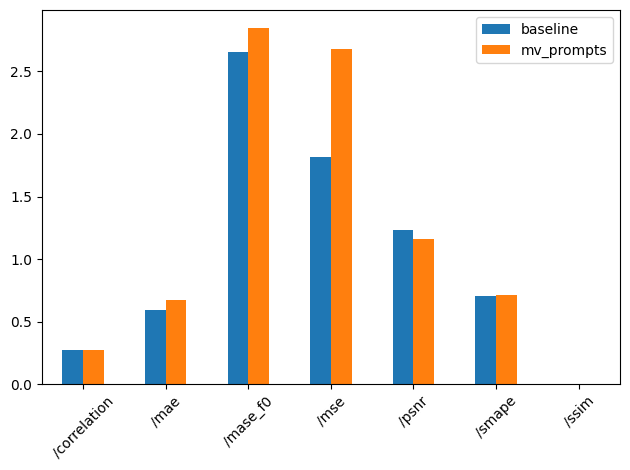

In [3]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
mean_df = pd.concat(final_res)
mean_df = mean_df.groupby(level=0).mean()
#mean_df['lstm']
mean_df.plot(kind='bar', ax=ax)
plt.xticks(rotation=45)
plt.tight_layout()

In [4]:
# transpose mean_df and std_df
mean_df = mean_df.T
std_df = std_df.T

In [10]:
mean_df.columns

Index(['/correlation', '/mae', '/mase_f0', '/mse', '/smape', '/ssim'], dtype='object')

In [13]:
mean_df[['/mse', '/mae', '/smape', '/ssim', '/correlation']].round(4)

,/mse,/mae,/smape,/ssim,/correlation
neuroformer,92.1908,3.4323,0.8569,0.005,0.3997


In [14]:
std_df[['/mse', '/mae', '/smape', '/ssim', '/correlation']].round(4)

,/mse,/mae,/smape,/ssim,/correlation
neuroformer,255.2062,4.0493,0.0691,0.0089,0.114


In [36]:
output_dir ="results_ablation_prompts"
mean_df.to_csv(os.path.join(output_dir, 'ablation_prompts_mean_metrics1.csv'))
std_df.to_csv(os.path.join(output_dir, 'ablation_prompts_std_metrics1.csv'))

In [41]:
# read ablation_prompts_mean_metrics0 and ablation_prompts_std_metrics1 and join
mean_df0 = pd.read_csv(os.path.join(output_dir, 'ablation_prompts_mean_metrics0.csv'), index_col=0)
std_df0 = pd.read_csv(os.path.join(output_dir, 'ablation_prompts_std_metrics0.csv'), index_col=0)

mean_df1 = pd.read_csv(os.path.join(output_dir, 'ablation_prompts_mean_metrics1.csv'), index_col=0)
std_df1 = pd.read_csv(os.path.join(output_dir, 'ablation_prompts_std_metrics1.csv'), index_col=0)

mean_df = pd.concat([mean_df1, mean_df0])
std_df = pd.concat([std_df1, std_df0])

In [44]:
metrics = ["/mse", "/mae", "/mase_f0", "/smape", "/correlation", "/ssim", "/psnr"]
mean_df[metrics].to_csv(os.path.join(output_dir, 'ablation_prompts_mean_metrics.csv'))
std_df[metrics].to_csv(os.path.join(output_dir, 'ablation_prompts_std_metrics.csv'))

In [44]:
#ordered_models = ["lstm", "informer", "autoformer", "brainlm_e2e", "brainlm_fs", "crossformer_gnorm", "ours_gnorm"]
#mean_df[ordered_models].T

# reverse order of rows
mean_df = mean_df.iloc[::-1]
std_df = std_df.iloc[::-1]

In [46]:
# reset index
mean_df = mean_df.reset_index(drop=True)
std_df = std_df.reset_index(drop=True)

In [48]:
import pandas as pd

metrics = ["K", "D", "/mse", "/mae", "/mase_f0", "/smape", "/correlation", "/ssim", "/psnr"]

In [49]:
mean_df[metrics]

,K,D,/mse,/mae,/mase_f0,/smape,/correlation,/ssim,/psnr
0,32,64,0.030949,0.152163,2.696067,0.661547,0.157360,0.060558,1.362317
1,32,128,0.026440,0.128072,2.169976,0.640569,0.257050,0.090184,2.758843
2,32,256,0.051066,0.179259,2.985677,0.763861,0.284742,0.016459,-0.109544
3,32,512,0.027462,0.113309,1.519753,0.751265,0.133923,0.015133,4.311367
4,4,128,0.028377,0.132001,1.940115,0.744181,0.161104,0.009912,2.873732
5,8,128,0.033343,0.160519,2.746172,0.672971,0.201114,0.060084,1.120975
6,16,128,0.014892,0.081308,1.148131,0.646972,0.218510,0.091057,6.223766
7,128,128,0.040334,0.141773,2.300863,0.685800,0.218090,0.064294,3.143576
8,256,128,0.027876,0.118864,1.839850,0.711767,0.148919,0.035211,3.934337
9,512,128,0.026604,0.115569,1.626537,0.768598,0.167825,0.013530,3.757577


In [50]:
std_df[metrics]

,K,D,/mse,/mae,/mase_f0,/smape,/correlation,/ssim,/psnr
0,32,64,0.009006,0.028446,1.709213,0.183202,0.010047,0.060242,7.086810
1,32,128,0.005447,0.014520,1.241338,0.154168,0.076739,0.086059,6.248416
2,32,256,0.008608,0.015669,1.640662,0.061892,0.080484,0.028526,6.545403
3,32,512,0.027521,0.064084,0.712949,0.110849,0.019801,0.052155,3.561855
4,4,128,0.013803,0.032069,0.747016,0.048579,0.049933,0.028496,4.455188
5,8,128,0.006228,0.019710,1.593867,0.173578,0.065326,0.072977,6.692436
6,16,128,0.008368,0.024089,0.326747,0.063242,0.072217,0.058120,3.190906
7,128,128,0.039858,0.075581,2.054897,0.105291,0.080841,0.062088,5.644676
8,256,128,0.014645,0.040922,1.209505,0.103466,0.043127,0.051322,4.310702
9,512,128,0.015906,0.043435,0.730567,0.105067,0.077440,0.052623,3.556790


In [52]:
# save results
output_dir = 'results_ablation_KD'
os.makedirs(output_dir, exist_ok=True)

mean_df[metrics].to_csv(os.path.join(output_dir, 'ablation_KD_mean_metrics.csv'))
std_df[metrics].to_csv(os.path.join(output_dir, 'ablation_KD_std_metrics.csv'))

In [ ]:
def bold_result(mean, std):
    return "& \resultnof{\textbf{" + f"{mean:.2f}" + "}}{" + f"{std:.2f}" + "} "

In [ ]:
def result(mean, std):
    return "& \resultnof{" + f"{mean:.2f}" + "}{" + f"{std:.2f}" + "} "

In [ ]:
model = "lstm"
metrics = ["/mse", "/mae", "/mase_f0", "/smape", "/correlation", "/ssim", "/psnr"]

In [ ]:
metrics = ["/correlation"]

In [ ]:
s = []

for model in ordered_models:
    
    model_str = ""
    
    for metric in metrics:
        mean = mean_df[model][metric]
        std = std_df[model][metric]
        if model == "ours_gnorm":
            model_str += bold_result(mean, std)
        else:
            model_str += result(mean, std)
            
    s.append(model + " " + model_str)

In [ ]:
s

['lstm & \resultnof{0.37}{0.12} ',
 'informer & \resultnof{0.30}{0.03} ',
 'autoformer & \resultnof{0.31}{0.08} ',
 'brainlm_e2e & \resultnof{0.33}{0.12} ',
 'brainlm_fs & \resultnof{0.33}{0.12} ',
 'crossformer_gnorm & \resultnof{0.30}{0.08} ',
 'ours_gnorm & \resultnof{\textbf{0.33}}{0.07} ']

In [ ]:
result(0.1, 0.2) + result(0.5, 78)

'& \resultnof{0.10}{0.20} & \resultnof{0.50}{78.00} '

In [ ]:
"& \resultnof{\textbf{0.25}}{--}  & \resultnof{\textbf{0.35}}{--}  & \resultnof{\textbf{2.40}}{--} & \resultnof{\textbf{0.69}}{--} & \resultnof{\textbf{0.30}}{--} & \resultnof{\textbf{0.07}}{--} & \resultnof{\textbf{0.67}}{--}"

'& \resultnof{\textbf{0.25}}{--}  & \resultnof{\textbf{0.35}}{--}  & \resultnof{\textbf{2.40}}{--} & \resultnof{\textbf{0.69}}{--} & \resultnof{\textbf{0.30}}{--} & \resultnof{\textbf{0.07}}{--} & \resultnof{\textbf{0.67}}{--}'

In [ ]:
os.makedirs('results_all_mice', exist_ok=True)
mean_df.to_csv('results_all_mice/mean.csv')
std_df.to_csv('results_all_mice/std.csv')